<a href="https://colab.research.google.com/github/caramos84/Quantum/blob/main/CellularAutomaton02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Autómatas celulares 02
# Carlos Ramos + ChatGPT o1
# 01/04/2025

import networkx as nx
import matplotlib.pyplot as plt
import random

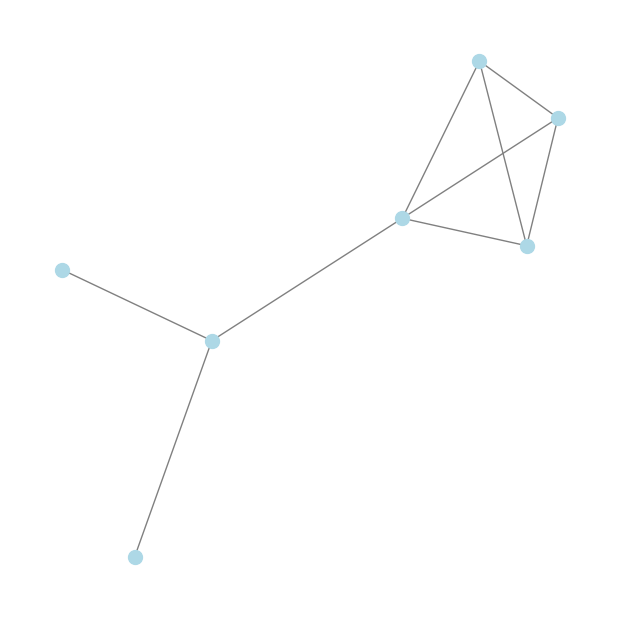

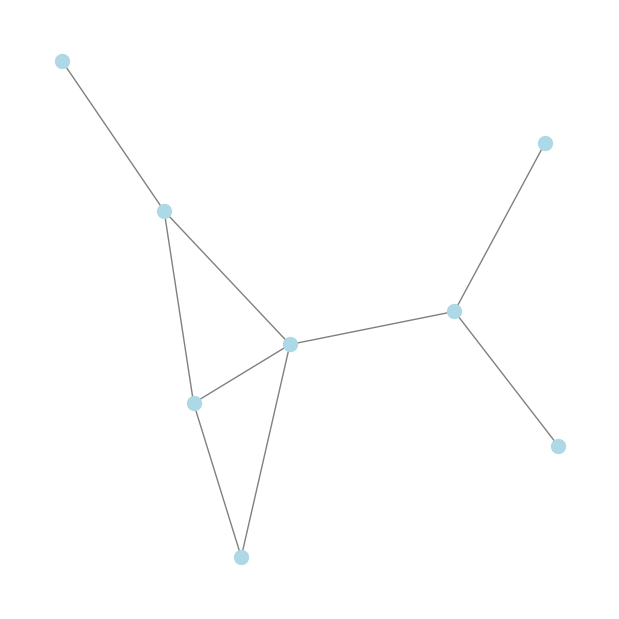

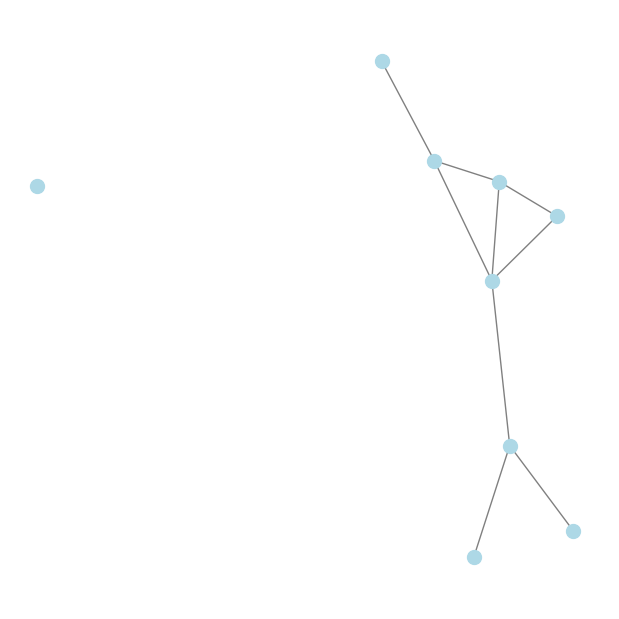

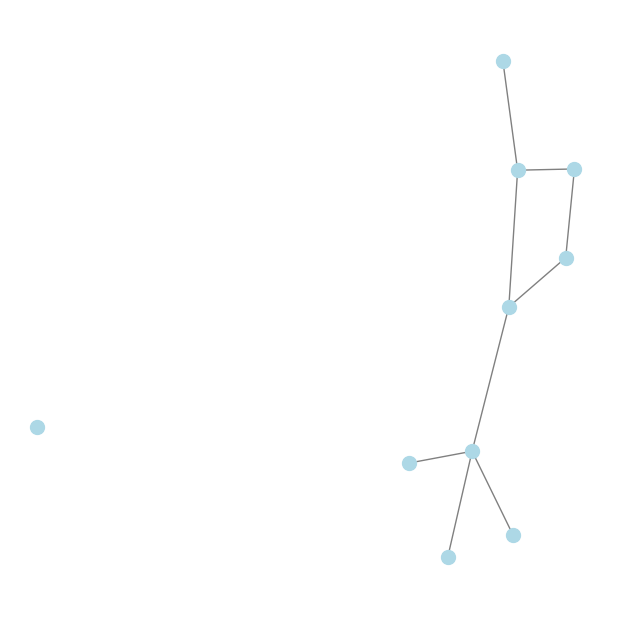

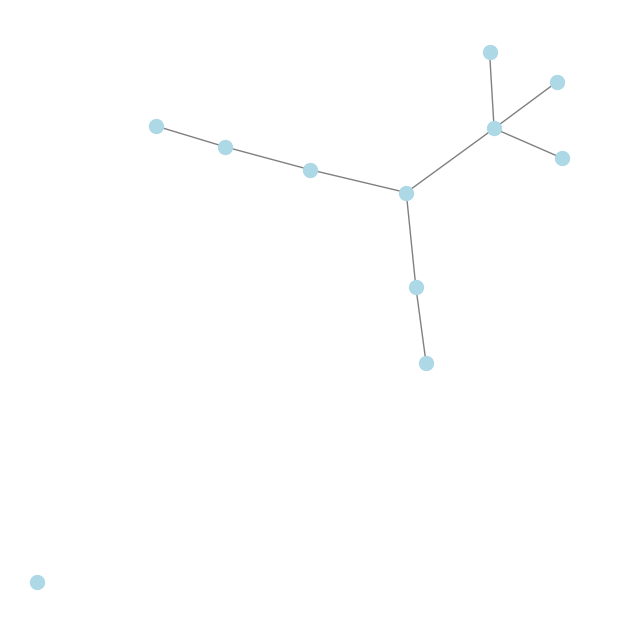

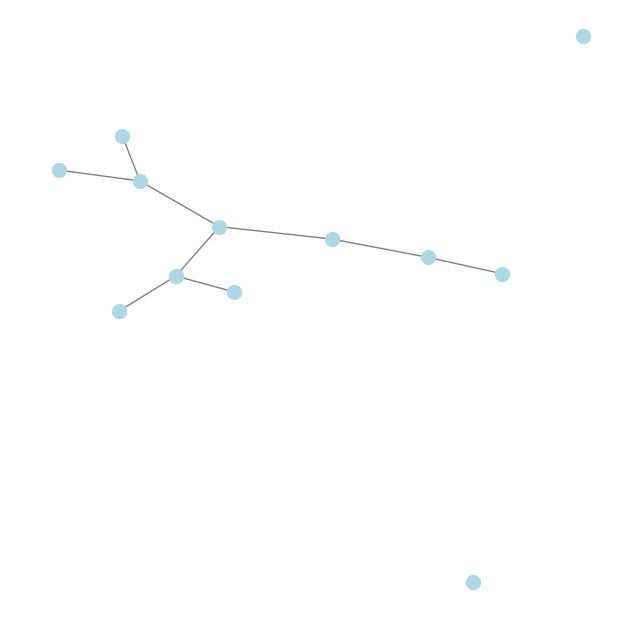

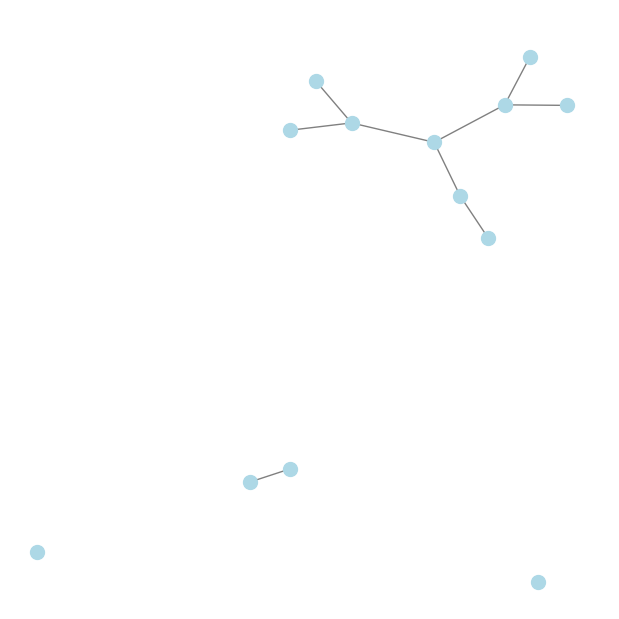

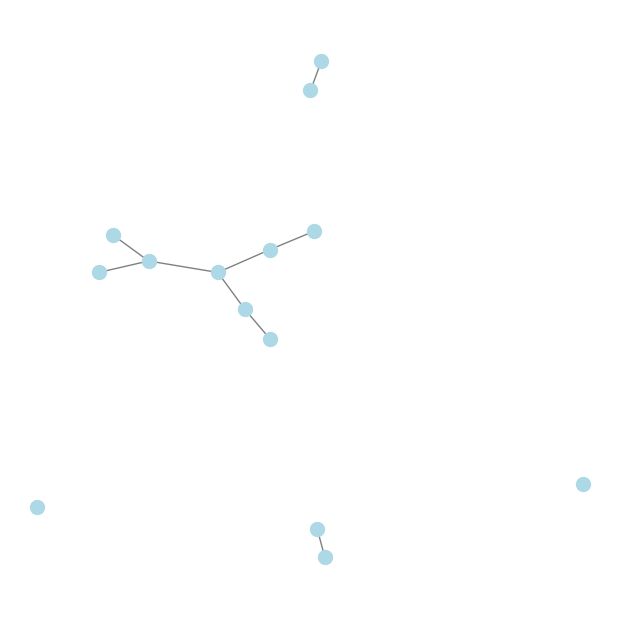

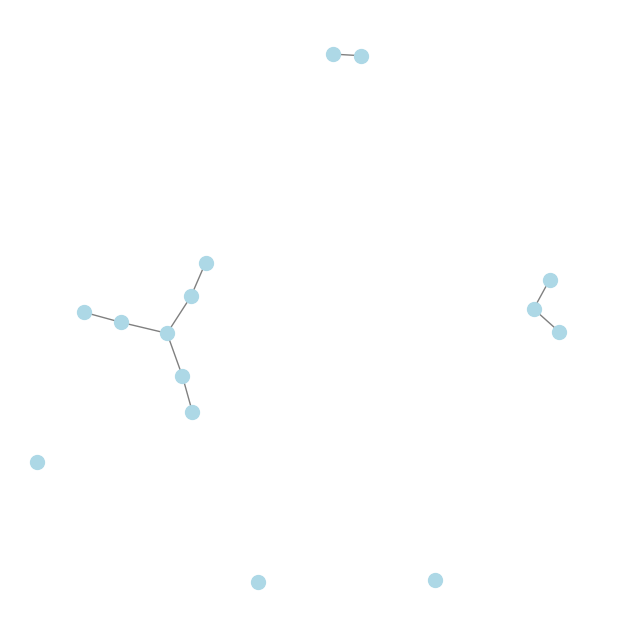

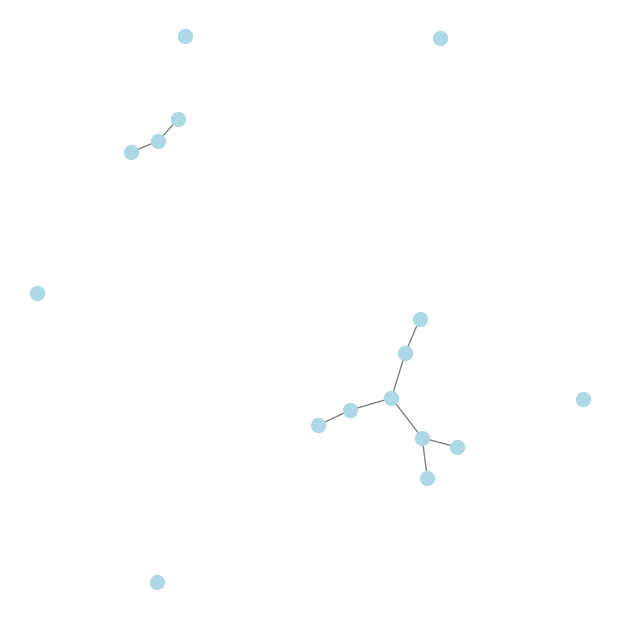

In [13]:
# Creación de la función de inicio del grafo basado en triángulos

def initialize_graph(structure='random', nodes=20):
    G = nx.Graph()

    if structure == 'triangle':
        G.add_edges_from([(0, 1), (1, 2), (2, 0)])
    elif structure == 'square':
        G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
    elif structure == 'random':
        for i in range(nodes):
            G.add_node(i)
        if nodes > 1:
            for _ in range(nodes * 2):  # Número arbitrario de conexiones iniciales
                a, b = random.sample(list(G.nodes), 2)
                G.add_edge(a, b)

    return G

def evolve_graph(G, iterations=10):
    for _ in range(iterations):
        # Regla 1: Crecimiento por agregación preferencial
        new_node = max(G.nodes) + 1
        existing_node = random.choice(list(G.nodes))
        G.add_node(new_node)
        G.add_edge(new_node, existing_node)

        # Regla 2: Eliminación de conexiones débiles (aleatorias en este caso)
        if G.number_of_edges() > 3:
            edge_to_remove = random.choice(list(G.edges))
            G.remove_edge(*edge_to_remove)

        draw_graph(G)

def draw_graph(G):
    plt.figure(figsize=(6, 6))
    nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.show()

# Configuración inicial y evolución
graph = initialize_graph('random', nodes=6)
evolve_graph(graph, iterations=10)